In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
import xgboost as xgb

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import make_scorer, mean_squared_error,mean_absolute_error

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

root_dir = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.append(root_dir)

from utils.utils import *
from utils.constants import *
from src.shap import *



Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


/Users/yinpuli/opt/anaconda3/envs/py-311/lib/python3.11/site-packages/shap/utils/_clustering.py:34: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit
/Users/yinpuli/opt/anaconda3/envs/py-311/lib/python3.11/site-packages/shap/utils/_clustering.py:53: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit
/Users/yinpuli/opt/anaconda3/envs/py-311/lib/python3.11/site-p

In [2]:
######## Import data ########


y_train = pd.read_csv(get_absolute_path('y_train.csv', 'data'))
y_test = pd.read_csv(get_absolute_path('y_test.csv', 'data'))


stack_train = pd.read_csv(get_absolute_path('stacked_X_tr.csv', 'data'))
stack_test  = pd.read_csv(get_absolute_path('stacked_X_te.csv', 'data'))

stack_train = stack_train.astype(column_data_extended_types)
stack_test = stack_test.astype(column_data_extended_types)



######## Feature Engineering ##########

# Select numeric and categorical columns
numeric_columns = stack_train.select_dtypes(include=['float64']).columns
categorical_columns = [#'Date', 
                       'Location_ID',
                    #    'Year',
                       'Month',
                       'Week',
                       'Weekday',
                       'Season'
                       ]  # Add any categorical columns here

# Create preprocessing transformers
numeric_transformer = StandardScaler()  # we can use other scalers as well
categorical_transformer = OneHotEncoder(drop=None)  # Use one-hot encoding for categorical columns

# Create a column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_columns),
        ('cat', categorical_transformer, categorical_columns)
    ]
)

# Fit the preprocessor on training data and transform both train and test data
X_train_preprocessed = preprocessor.fit_transform(stack_train)
X_test_preprocessed  = preprocessor.transform(stack_test)


# Get the column names after one-hot encoding
categorical_encoded_columns = preprocessor.named_transformers_['cat']\
                                    .get_feature_names_out(input_features=categorical_columns)

# Convert X_train_preprocessed and X_test_preprocessed to DataFrames

X_train_preprocessed_df = pd.DataFrame(X_train_preprocessed.toarray(), columns=np.concatenate([numeric_columns, categorical_encoded_columns]))
X_test_preprocessed_df = pd.DataFrame(X_test_preprocessed.toarray(), columns=np.concatenate([numeric_columns, categorical_encoded_columns]))

In [11]:
best_mlp_file = get_absolute_path(
    file_name = 'best_mlp_model.joblib'
    , rel_path = 'results'
)

best_mlp_shap_file_1 = get_absolute_path(
    file_name = 'best_mlp_shap_bar.png'
    , rel_path = 'results' + '/' + 'shap'
)


best_mlp_shap_file_2 = get_absolute_path(
    file_name = 'best_mlp_shap_val.png'
    , rel_path = 'results' + '/' + 'shap'
)



In [12]:
load_file_path = best_mlp_file
save_file_path_1 = best_mlp_shap_file_1
save_file_path_2 = best_mlp_shap_file_2
refit_X = X_train_preprocessed_df
refit_y = y_train
figure_dpi = 300

In [13]:
# Load the best model and its info file
best_model, best_model_info = load_model(load_file_path)


# Get the best hyperparameters and best model
best_params = best_model_info['best_params']
# y_pred      = best_model_info['y_pred']
eval_metrics= best_model_info['eval_metrics']

# Refit model
refit_model = best_model.fit(refit_X, refit_y)

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


In [ ]:
np.bool = np.bool_
np.int = np.int_

In [ ]:
if isinstance(best_model,MLPRegressor):
    print("NN Model...")

In [ ]:
refit_X_summary = shap.kmeans(refit_X, 10)
explainer = shap.KernelExplainer(best_model, refit_X_summary)
shap_values = explainer.shap_values(refit_X) # TODO: why not refit_X_summary?

In [ ]:
gen_shap_results(
    load_file_path = best_mlp_file
    , save_file_path_1 = best_mlp_shap_file_1
    , save_file_path_2 = best_mlp_shap_file_2
    , refit_X = X_train_preprocessed_df
    , refit_y = y_train
    , figure_dpi = 300
)


Tree Based Model...


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.


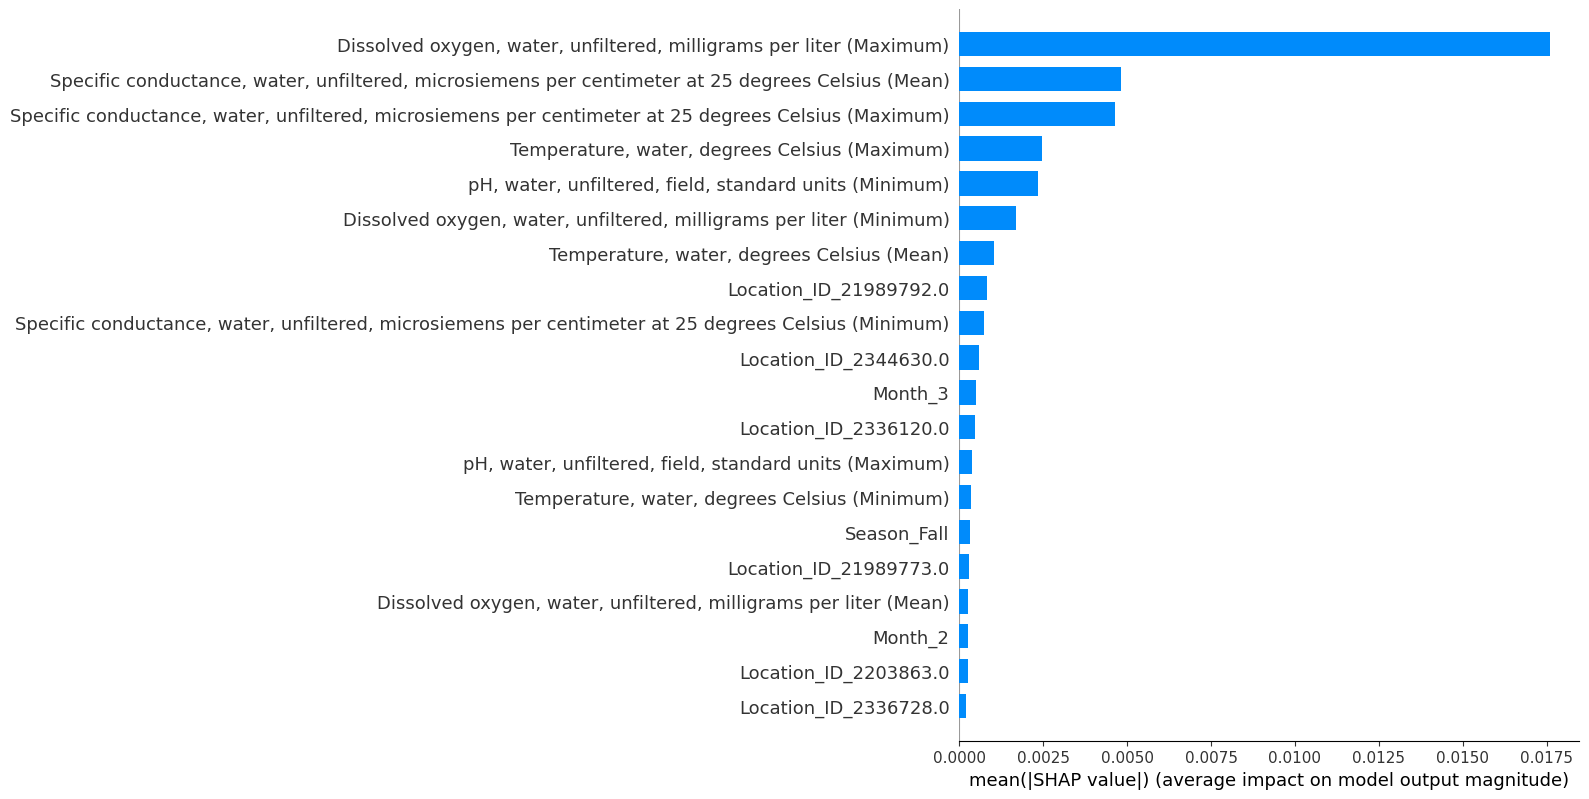

<Figure size 1500x1000 with 0 Axes>

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.


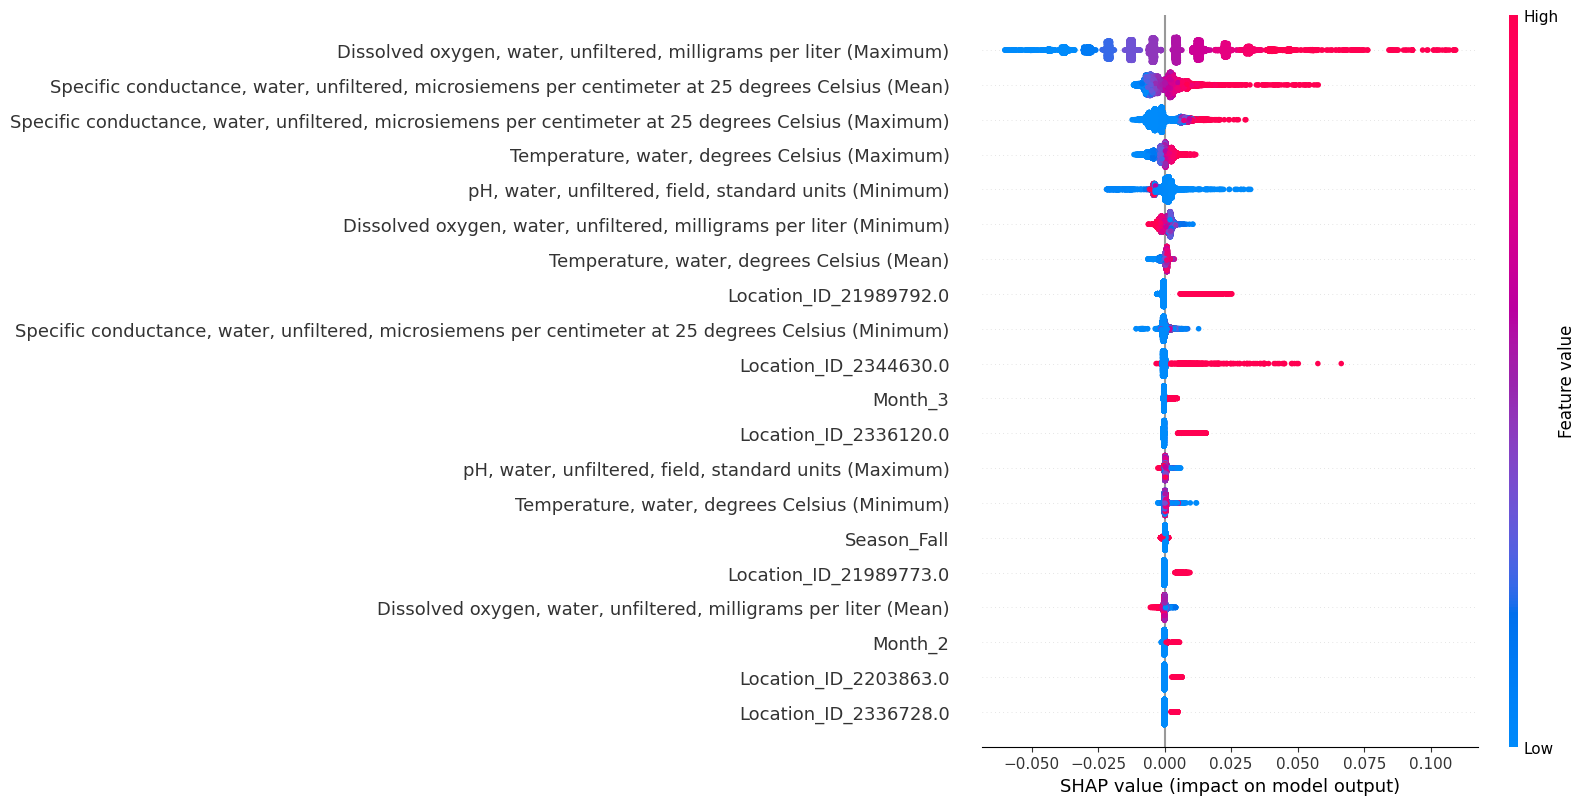

<Figure size 1500x1000 with 0 Axes>

In [4]:
best_xgb_file = get_absolute_path(
    file_name = 'best_xgb_model.joblib'
    , rel_path = 'results'
)

best_xgb_shap_file_1 = get_absolute_path(
    file_name = 'best_xgb_shap_bar.png'
    , rel_path = 'results' + '/' + 'shap'
)


best_xgb_shap_file_2 = get_absolute_path(
    file_name = 'best_xgb_shap_val.png'
    , rel_path = 'results' + '/' + 'shap'
)


gen_shap_results(
    load_file_path = best_xgb_file
    , save_file_path_1 = best_xgb_shap_file_1
    , save_file_path_2 = best_xgb_shap_file_2
    , refit_X = X_train_preprocessed_df
    , refit_y = y_train
    , figure_dpi = 300
)